In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    final : int
    oper : str
    res : str

In [3]:
def add_node(state : AgentState) -> AgentState:
    """Node to add numbers in the state"""

    state['final'] = state['num1'] + state['num2']
    state['res'] = f"The final number after operation: {state['oper']} is : {state['final']}"
    return state

def sub_node(state : AgentState) -> AgentState:
    """Node to subtract numbers in the state"""

    state['final'] = state['num1'] - state['num2']
    state['res'] = f"The final number after operation: {state['oper']} is : {state['final']}"
    return state


def route_to_operation(state : AgentState) -> AgentState:
    """Node to route the operation"""

    if state['oper'] == "+":
        return "add"
    elif state['oper'] == "-":
        return "sub"

In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("sub_node", sub_node)
graph.add_node("router", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    route_to_operation,
    {
        # edge : node
        "add" : "add_node",
        "sub" : "sub_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

app = graph.compile()

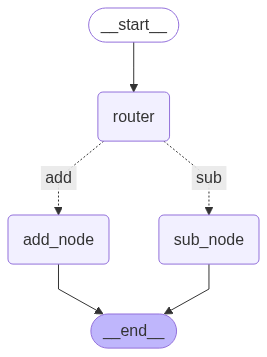

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
res = app.invoke({"num1" : 23, "num2" : 10, "oper" : "+"})

In [7]:
res

{'num1': 23,
 'num2': 10,
 'final': 33,
 'oper': '+',
 'res': 'The final number after operation: + is : 33'}

In [8]:
res2 = app.invoke({"num1" : 23, "num2" : 10, "oper" : "-"})

In [9]:
res2

{'num1': 23,
 'num2': 10,
 'final': 13,
 'oper': '-',
 'res': 'The final number after operation: - is : 13'}